# 01-Les bases de Research avec Quantopian

**N'oubliez pas que ce notebook ne fonctionnera que sur Quantopian ! Créez un compte et téléversez (upload) le fichier de ce notebook. Ces commandes et fonctions ne fonctionneront que sur la plateforme de trading Quantopian !**

Notez qu'une grande partie du texte écrit dans ce notebook en Markdown provient directement des documents et tutoriels Quantopian, regardez les bien aussi, ils sont bien faits !

## Research

Le format notebook nous permet de rassembler facilement les informations sur les différents titres au sein de la plateforme Quantopian. Il faut garder à l'esprit que cela est différent de la plateforme de codage de base de Quantopian, qui se concentre sur la mise en œuvre effective et le backtesting des stratégies de trading.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PAS BESOIN D'UTILISER LA COMMANDE MAGIQUE SUR QUANTOPIAN !

## Obtenir des informations

Passons en revue quelques fonctions clés :

* get_pricing()
* symbols()

## get_pricing()

La fonction `get_pricing` permet d'accéder à 12 ans de données sur le prix des actions américaines : les mêmes données que celles utilisées par le backtester Quantopian.

`get_pricing` retourne un <b>objet Pandas</b>. Il peut s'agir d'un dataframe ou d'une série, selon les valeurs d'entrée. 

In [2]:
mcdon = get_pricing('MCD',
                    start_date='2017-01-01', 
                    end_date = '2017-02-01', 
                    frequency='minute')

In [3]:
mcdon.head()

open_price    high     low  close_price    volume  \
2017-01-03 14:31:00+00:00      121.86  121.86  121.57       121.63  123665.0   
2017-01-03 14:32:00+00:00      121.73  121.92  121.41       121.45   13536.0   
2017-01-03 14:33:00+00:00      121.45  121.79  121.45       121.52   17562.0   
2017-01-03 14:34:00+00:00      121.45  121.80  121.44       121.75   12072.0   
2017-01-03 14:35:00+00:00      121.74  122.00  121.66       121.99    8100.0   

                            price  
2017-01-03 14:31:00+00:00  121.63  
2017-01-03 14:32:00+00:00  121.45  
2017-01-03 14:33:00+00:00  121.52  
2017-01-03 14:34:00+00:00  121.75  
2017-01-03 14:35:00+00:00  121.99

In [4]:
mcdon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2017-01-03 14:31:00+00:00 to 2017-02-01 21:00:00+00:00
Data columns (total 6 columns):
open_price     8188 non-null float64
high           8188 non-null float64
low            8188 non-null float64
close_price    8188 non-null float64
volume         8190 non-null float64
price          8190 non-null float64
dtypes: float64(6)
memory usage: 447.9 KB


In [5]:
# On ne peut revenir que 12 ans en arrière
# ce qui est vraiment tout ce dont vous avez besoin pour l'algo de trading', 
# remonter plus loin est probablement plus du bruit que du signal.

mcdon = get_pricing('MCD',
                    start_date='2005-01-01', 
                    end_date = '2017-01-01', 
                    frequency='daily')

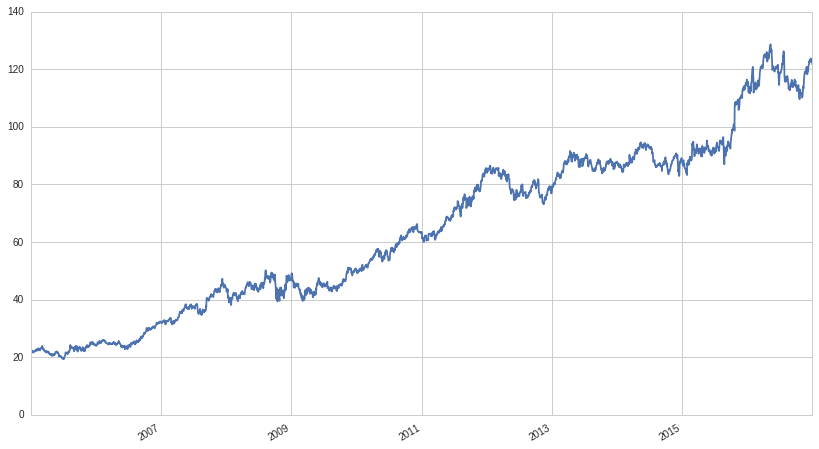

In [6]:
mcdon['close_price'].plot()

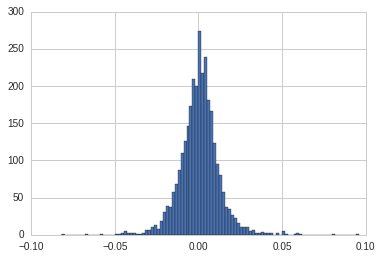

In [7]:
mcdon['close_price'].pct_change(1).hist(bins=100,figsize=(6,4))

## symbols()

By default `symbols` returns the security object for a ticker symbol. Specify a ticker symbol, or list of symbols, as a string and get a list of security objects back. 

- Use `symbol_reference_date` to identify which date you want the symbol back for a particular ticker symbol. 
- Specify how you would like missing results to be handled with `handle_missing`



In [8]:
mcdon_eq_info = symbols('MCD')

In [9]:
type(mcdon_eq_info)

<class 'zipline.assets._assets.Equity'>

In [10]:
for key in mcdon_eq_info.to_dict():
    print(key)
    print(mcdon_eq_info.to_dict()[key])
    print('\n')

auto_close_date
2020-01-30 00:00:00+00:00


asset_name
MCDONALDS CORP


tick_size
0.01


exchange_info
ExchangeInfo('NEW YORK STOCK EXCHANGE', 'NYSE', 'US')


exchange_full
NEW YORK STOCK EXCHANGE


exchange
NYSE


symbol
MCD


start_date
2002-01-01 00:00:00+00:00


multiplier
1.0


sid
4707


first_traded
None


end_date
2020-01-27 00:00:00+00:00


